In [1]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.tree import DecisionTreeClassifier
import sklearn.svm as svm
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
import mindspore.dataset as ds
import mindspore.dataset.vision.c_transforms as C
import matplotlib.pyplot as plt

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [12]:
def visualize(X, y, y_pred, title=None):
    # 可视化,pca降维或者tsne

    pca = PCA(n_components=2)
    X_dim_reduction = pca.fit_transform(X)

    # print(X_dim_reduction.shape)
    plt.figure(figsize=(10, 12))
    def get_color(y):
        color_dict = {-1: 'white', 0: 'red', 1: 'orange', 2: 'yellow', 3: 'green', 4: 'magenta', 
                      5: 'blue', 6: 'cyan', 7: 'brown', 8: 'purple', 9: 'aquamarine'}
        color = []
        for i in range(y.shape[0]):
            color.append(color_dict.get(y[i].item(), 'olive'))
        return color
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    axs[0].set_title('origin data')
    axs[0].scatter(X_dim_reduction[:, 0], X_dim_reduction[:, 1], c=get_color(y), edgecolors='black')

    axs[1].set_title('predict result')
    axs[1].scatter(X_dim_reduction[:, 0], X_dim_reduction[:, 1], c=get_color(y_pred), edgecolors='black')

    plt.show()

In [3]:
def get_dataset(split, num):
    data_path = './datasets/MNIST_Data/' + split
    dataset = ds.MnistDataset(data_path)
    #归一化
    image_transforms = [
        C.Rescale(1.0 / 255.0, 0),
        C.Normalize(mean=(0.1307,), std=(0.3081,)),
        C.HWC2CHW()
    ]
    dataset = dataset.map(image_transforms, 'image')
    
    dataset = dataset.batch(num)
    #获取迭代器
    iterator_show = dataset.create_dict_iterator()
    dict_data = next(iterator_show)
    x = dict_data["image"].reshape(num, -1).asnumpy()
    y = dict_data["label"].asnumpy()
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # pca = PCA(n_components=8)
    # X_train = pca.fit_transform(X_train)
    # X_test = pca.fit_transform(X_test)
    
    return X_train, X_test, y_train, y_test

In [4]:
X_train, X_test, y_train, y_test = get_dataset("train", 1000)
print(f'X_train.shape:{X_train.shape}')
print(f'y_train.shape:{y_train.shape}')
print(f'X_test.shape:{X_test.shape}')
print(f'y_test.shape:{y_test.shape}')

X_train.shape:(800, 784)
y_train.shape:(800,)
X_test.shape:(200, 784)
y_test.shape:(200,)


In [17]:
print(X_train)

[[-0.42421296 -0.42421296 -0.42421296 ... -0.42421296 -0.42421296
  -0.42421296]
 [-0.42421296 -0.42421296 -0.42421296 ... -0.42421296 -0.42421296
  -0.42421296]
 [-0.42421296 -0.42421296 -0.42421296 ... -0.42421296 -0.42421296
  -0.42421296]
 ...
 [-0.42421296 -0.42421296 -0.42421296 ... -0.42421296 -0.42421296
  -0.42421296]
 [-0.42421296 -0.42421296 -0.42421296 ... -0.42421296 -0.42421296
  -0.42421296]
 [-0.42421296 -0.42421296 -0.42421296 ... -0.42421296 -0.42421296
  -0.42421296]]


In [ ]:
#降维数据
pca = PCA(n_components=2)
X_train_lower = pca.fit_transform(X_train)
X_test_lower = pca.fit_transform(X_test)

In [57]:
print(f'X_train_lower.shape:{X_train_lower.shape}')
print(f'X_test_lower.shape:{X_test_lower.shape}')
print(X_train_lower[1:10])
print(X_test_lower[1:10])

X_train_lower.shape:(800, 2)
X_test_lower.shape:(200, 2)
[[-9.65491    -2.5064108 ]
 [ 6.499065   10.219176  ]
 [ 3.0091343   5.399989  ]
 [ 1.9668894  -1.9281023 ]
 [ 0.22741629 -5.6329017 ]
 [ 1.0383185   2.3475945 ]
 [-1.7165016   3.9295266 ]
 [-0.479247    2.5563045 ]
 [ 5.9227185  10.58128   ]]
[[ 17.488417    -5.4272532 ]
 [  4.571991     6.2660933 ]
 [ -5.043976     0.2159701 ]
 [  0.62662697   6.7290916 ]
 [-10.024604    -1.1173084 ]
 [ -8.22393      8.149832  ]
 [ -5.2930045   -5.1416607 ]
 [-10.319516     2.3633897 ]
 [ -1.3101629    0.6078682 ]]


In [9]:
#混淆矩阵可视化
def visualize_cm(cm2_1):
    classes = ['0','1', '2', '3', '4', '5', '6', '7', '8','9']
    proportion = []
    length = len(cm2_1)
    print(length)
    for i in cm2_1:
        for j in i:
            temp = j / (np.sum(i))
            proportion.append(temp)
    # print(np.sum(confusion_matrix[0]))
    # print(proportion)
    pshow = []
    for i in proportion:
        pt = "%.2f%%" % (i * 100)
        pshow.append(pt)
    proportion = np.array(proportion).reshape(length, length)  # reshape(列的长度，行的长度)
    pshow = np.array(pshow).reshape(length, length)

    # print(pshow)
    config = {
        "font.family": 'DejaVu Sans',  # 设置字体类型
    }
    rcParams.update(config)
    plt.imshow(proportion, interpolation='nearest', cmap=plt.cm.Blues)  # 按照像素显示出矩阵
    # (改变颜色：'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds','YlOrBr', 'YlOrRd',
    # 'OrRd', 'PuRd', 'RdPu', 'BuPu','GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn')
    # plt.title('confusion_matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=8)
    plt.yticks(tick_marks, classes, fontsize=8)

    iters = np.reshape([[[i, j] for j in range(length)] for i in range(length)], (cm2_1.size, 2))
    for i, j in iters:
        if (i == j):
            plt.text(j, i - 0.12, format(cm2_1[i, j]), va='center', ha='center', fontsize=10, color='white',
                     weight=5)  # 显示对应的数字
            
        else:
            plt.text(j, i - 0.12, format(cm2_1[i, j]), va='center', ha='center', fontsize=10)  # 显示对应的数字
            

    plt.ylabel('True label', fontsize=16)
    plt.xlabel('Predict label', fontsize=16)
    plt.tight_layout()
    plt.show()

In [ ]:
# 用sklearn实验传统分类算法，包括决策树、随机森林、SVM、KNN、贝叶斯等（用其中的3个就行了）

In [51]:
# 决策树
params = {
    #特征选择标准
    'criterion': 'entropy',
    #特征划分点选择标准
    'splitter': 'best',
    #决策树最大深
    'max_depth': 15,
    #节点最小样本数
    'min_samples_split': 2,
    #叶子节点最小样本数
    'min_samples_leaf': 1,
    #叶子节点最小权重
    'min_weight_fraction_leaf': 0.0,
    #最大特征数
    'max_features': 0.5,
    #随机种子
    'random_state': None,
    #最大叶子节点数
    'max_leaf_nodes': None,
    #最小不纯度下降值
    'min_impurity_decrease': 0.0,
    #类别权重：防止训练集某些类别的样本过多，导致训练的决策树过于偏向这些类别
    'class_weight': None,
}
clf=DecisionTreeClassifier(**params)
clf2=DecisionTreeClassifier(**params)

In [52]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=15, max_features=0.5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [53]:
clf2.fit(X_train_lower,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=15, max_features=0.5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [54]:
y_pred = clf.predict(X_test)
print("desicion tree")
print(f'Accuracy: { accuracy_score(y_test, y_pred) }')
#Precision = TP/TP+FP 宏平均
print(f'Precision: { precision_score(y_test, y_pred, average="macro") }')
#Recall = TP/TP+FN
print(f'Recall: { recall_score(y_test, y_pred, average="macro") }')
#F1-score = 2*precision*recall/(precision+recall)
print(f'F1-score { f1_score(y_test, y_pred, average="macro") }')
cm2_1 = confusion_matrix(y_test, y_pred)
print(cm2_1.shape)
print('cm2 is:\n', cm2_1)

desicion tree
Accuracy: 0.62
Precision: 0.6183163456770268
Recall: 0.6254866516640465
F1-score 0.6060083291578178
(10, 10)
cm2 is:
 [[15  0  1  1  0  0  0  0  1  1]
 [ 0 16  0  0  0  0  0  0  0  0]
 [ 0  0 11  1  1  4  2  1  4  1]
 [ 0  0  1  9  0  3  0  0  1  2]
 [ 0  2  1  0 11  1  0  1  1  6]
 [ 2  0  0  1  0  8  0  1  0  0]
 [ 2  0  2  1  1  1 18  1  3  0]
 [ 1  1  1  3  0  1  0 21  0  4]
 [ 1  0  0  1  0  0  0  1 11  1]
 [ 1  0  0  0  1  1  1  2  3  4]]


10


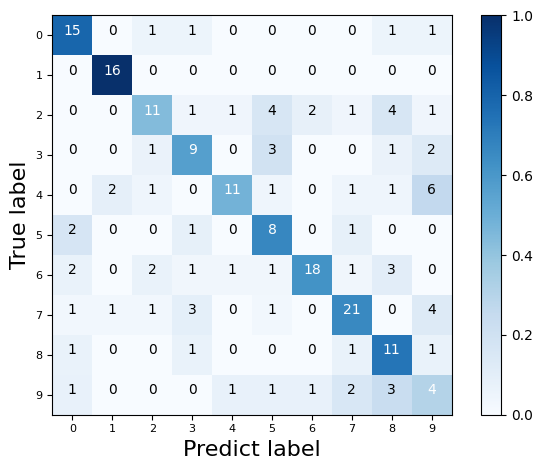

In [55]:
visualize_cm(cm2_1)

desicion tree
Accuracy: 0.115
Precision: 0.10050398855194251
Recall: 0.12837704755921636
F1-score 0.10717683258533932
(10, 10)
cm2 is:
 [[10  0  1  0  0  2  3  0  3  0]
 [ 0  0  0  0  0  0  0 13  0  3]
 [ 3  0  0  1  4  1  4  4  3  5]
 [ 1  0  2  0  2  5  1  1  1  3]
 [ 1  0  4  8  0  2  3  0  5  0]
 [ 1  0  4  0  0  5  1  1  0  0]
 [ 5  0  2  1  5  3  3  1  2  7]
 [ 0  5  9  8  0  3  0  3  2  2]
 [ 1  0  0  1  3  5  1  1  1  2]
 [ 2  1  4  2  0  2  0  1  0  1]]
10


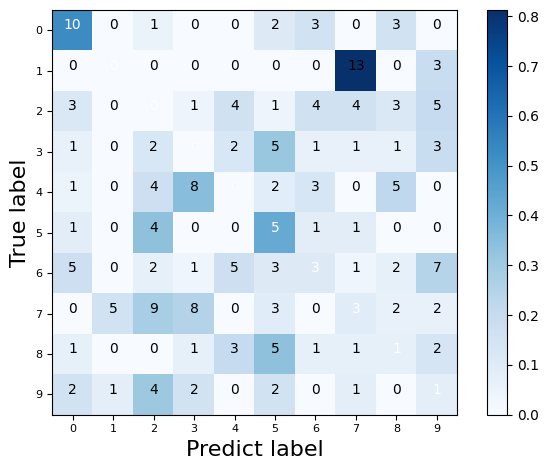

In [56]:
y_pred_lower = clf2.predict(X_test_lower)
print("desicion tree")
print(f'Accuracy: { accuracy_score(y_test, y_pred_lower) }')
#Precision = TP/TP+FP 宏平均
print(f'Precision: { precision_score(y_test, y_pred_lower, average="macro") }')
#Recall = TP/TP+FN
print(f'Recall: { recall_score(y_test, y_pred_lower, average="macro") }')
#F1-score = 2*precision*recall/(precision+recall)
print(f'F1-score { f1_score(y_test, y_pred_lower, average="macro") }')
cm2_1_lower = confusion_matrix(y_test, y_pred_lower)
print(cm2_1_lower.shape)
print('cm2 is:\n', cm2_1_lower)
visualize_cm(cm2_1_lower)

Decision Tree Predict Result


<Figure size 1000x1200 with 0 Axes>

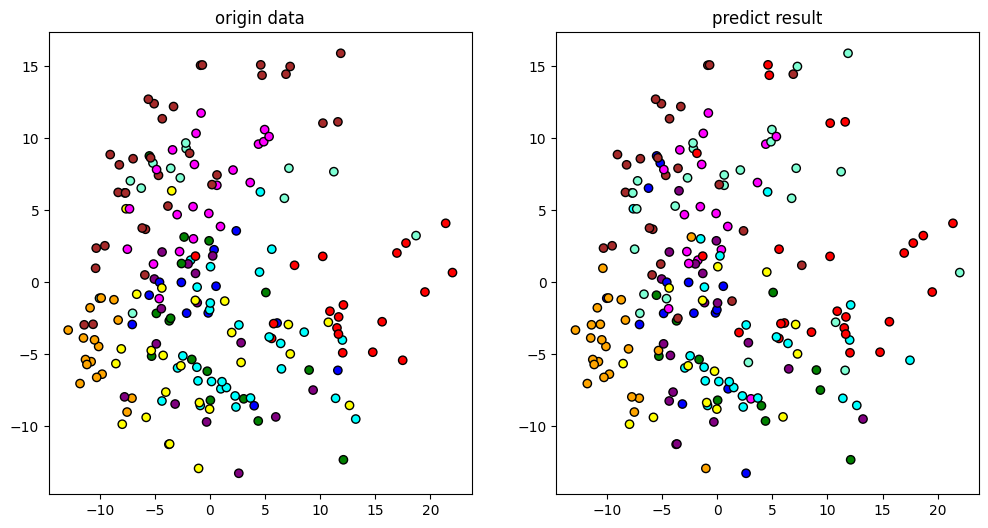

In [28]:
print('Decision Tree Predict Result')
visualize(X_test,y_test,y_pred,title='Decision Tree Predict Result')

Desicion Tree Predict Result(using Tsne)


<Figure size 1000x1200 with 0 Axes>

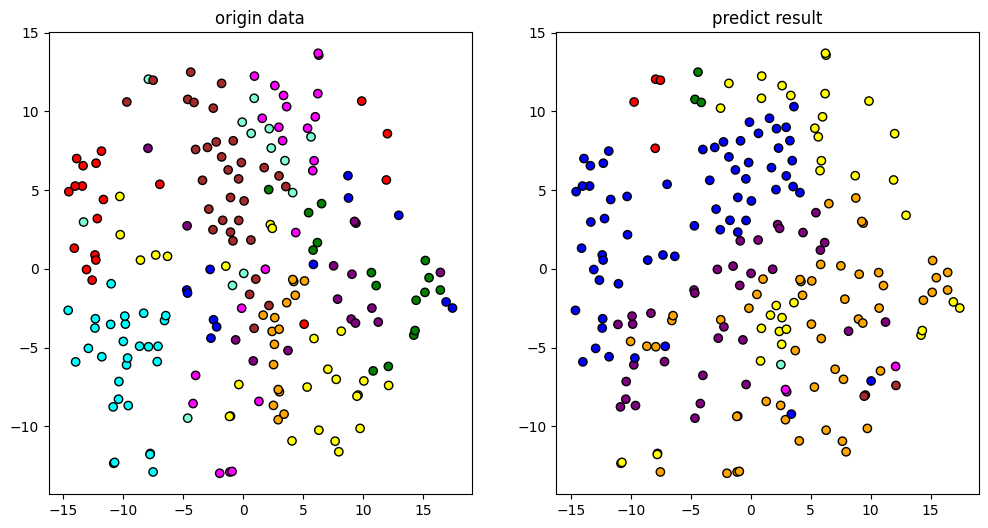

In [29]:
print('Desicion Tree Predict Result(using Tsne)')
visualize(X_test_lower,y_test,y_pred_lower,title='Desicion Tree Predict Result(using Tsne)')

In [30]:
# 随机森林
params2={
    #森林中树木的数量
    'n_estimators': 100,
    'criterion': 'entropy',
    
    #树的最大深度，超过最大深度的树枝都会被剪掉
    'max_depth': 10,
    
    #一个节点在分支后的每个子节点都必须包含至少min_samples_leaf个训练样本，否则分支就不会发生
    'min_samples_split': 2,
    
    #一个节点必须要包含至少min_samples_split个训练样本，这个节点才被允许分支，否则分支不会发生。
    'min_samples_leaf': 1,
    
    'min_weight_fraction_leaf': 0.0,
    #max_features限制分支时考虑的特振奋个数，超过限制个数的特征都会被舍弃，默认值为总特征个数开平方取整。
    'max_features': 0.5,
    'max_leaf_nodes': None,
    #限制信息增益的大小，信息增益小于设定数值的分支不会发生
    'min_impurity_decrease': 0.0, 
    
    'bootstrap': True, #是否有放回的采样训练样本
    'oob_score': False, #是否采用袋外样本来评估模型的好坏
    'n_jobs': None, #并行数
    
    'random_state': None, #随机种子
    'verbose': 0, #是否显示任务进程
    'warm_start': False, 
    
    'class_weight': None, 
}
rfc = RandomForestClassifier(**params2)

In [31]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features=0.5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
y_pred2 = rfc.predict(X_test)
print("desicion tree")
print(f'Accuracy: { accuracy_score(y_test, y_pred2) }')
#Precision = TP/TP+FP 宏平均
print(f'Precision: { precision_score(y_test, y_pred2, average="macro") }')
#Recall = TP/TP+FN
print(f'Recall: { recall_score(y_test, y_pred2, average="macro") }')
#F1-score = 2*precision*recall/(precision+recall)
print(f'F1-score { f1_score(y_test, y_pred2, average="macro") }')

desicion tree
Accuracy: 0.82
Precision: 0.8118325959895113
Recall: 0.8313155575552305
F1-score 0.8113931139604663


(10, 10)
cm2 is:
 [[18  0  0  0  0  0  0  0  1  0]
 [ 0 16  0  0  0  0  0  0  0  0]
 [ 0  0 17  1  0  0  0  3  3  1]
 [ 0  0  0 14  0  1  0  0  1  0]
 [ 0  1  0  0 17  0  0  1  0  4]
 [ 1  1  0  1  0  9  0  0  0  0]
 [ 1  0  2  0  0  2 24  0  0  0]
 [ 1  3  0  0  0  0  0 25  0  3]
 [ 1  0  0  1  0  0  0  0 13  0]
 [ 1  0  0  0  0  1  0  0  0 11]]
10


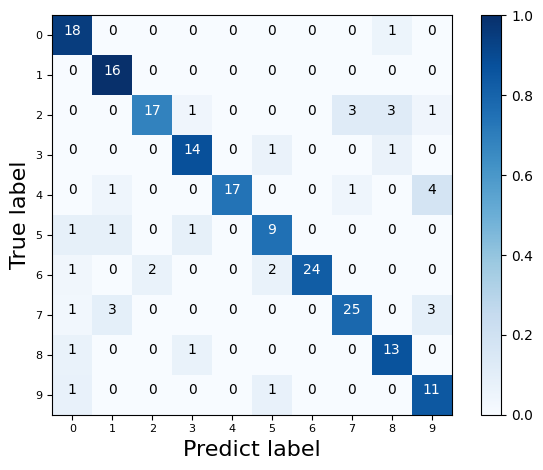

In [33]:
cm2_2 = confusion_matrix(y_test, y_pred2)
print(cm2_2.shape)
print('cm2 is:\n', cm2_2)
visualize_cm(cm2_2)

Random Forest Predict Result


<Figure size 1000x1200 with 0 Axes>

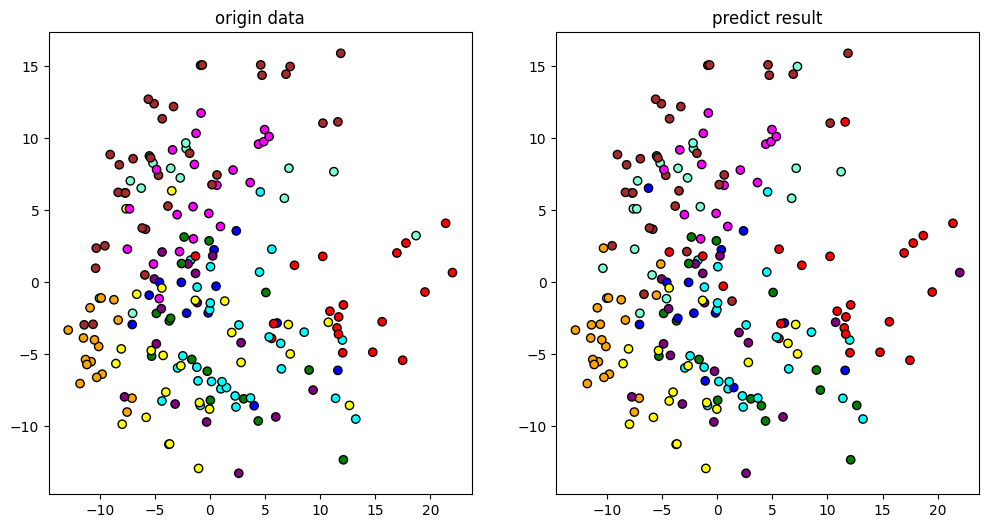

In [34]:
print('Random Forest Predict Result')
visualize(X_test,y_test,y_pred2,title='Random Forest Predict Result')

In [5]:
#svm
params3={
    "C": 1.0, #惩罚系数
    "kernel": "rbf", #核函数
    "degree": 3, #如果核函数是poly,多项式的维度
    "gamma": "scale", #核函数的系数('Poly', 'RBF' and 'Sigmoid')
    "coef0": 0.0, #核函数的常数项
    "shrinking": True, #是否使用启发式
    "probability": False, #是否启用概率估计
    "tol": 0.001, #停止训练的误差
    "cache_size": 200, #核函数的缓存大小
    "class_weight": None, #类别权重
    "verbose": False, #是否启用详细输出
    "max_iter": -1, #最大迭代次数
    "decision_function_shape": "ovr", #决策函数的形状
    "break_ties": False, #是否启用决策函数的平局处理
    "random_state": None, #随机种子
}
svmc = svm.SVC(**params3)

In [6]:
svmc.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [7]:
y_pred3 = svmc.predict(X_test)
print("SVM")
print(f'Accuracy: { accuracy_score(y_test, y_pred3) }')
#Precision = TP/TP+FP 宏平均
print(f'Precision: { precision_score(y_test, y_pred3, average="macro") }')
#Recall = TP/TP+FN
print(f'Recall: { recall_score(y_test, y_pred3, average="macro") }')
#F1-score = 2*precision*recall/(precision+recall)
print(f'F1-score { f1_score(y_test, y_pred3, average="macro") }')

SVM
Accuracy: 0.95
Precision: 0.9499630325814536
Recall: 0.9482170008354218
F1-score 0.948589735106118


10


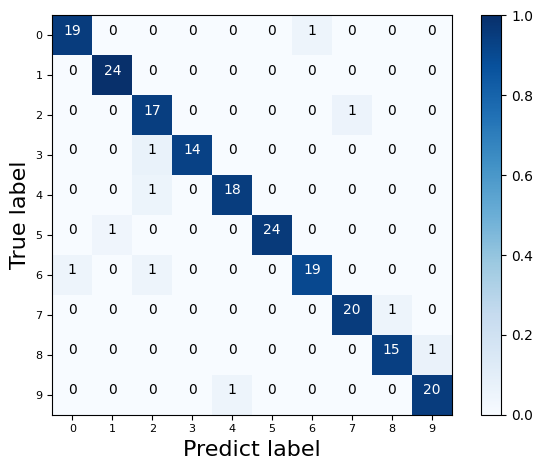

In [11]:
cm2_3 = confusion_matrix(y_test, y_pred3)
visualize_cm(cm2_3)

<Figure size 1000x1200 with 0 Axes>

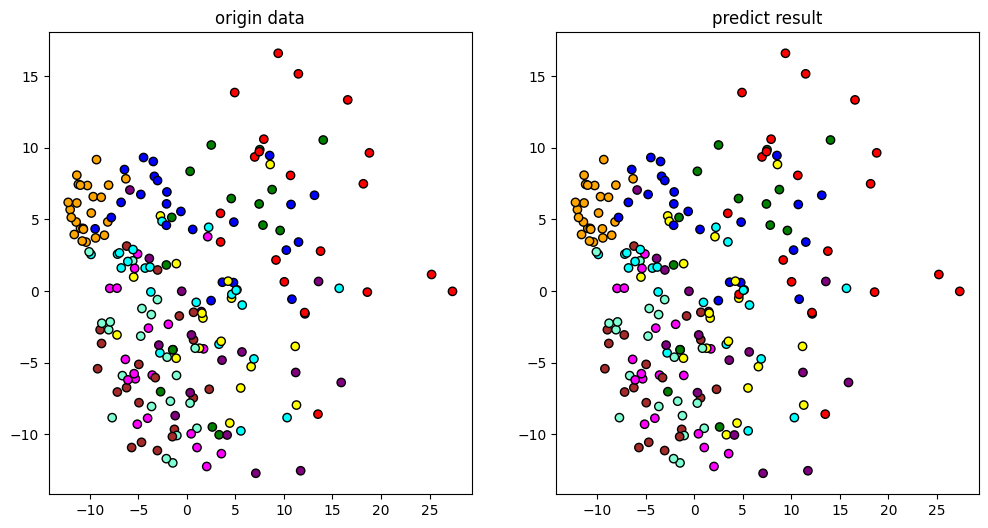

In [13]:
visualize(X_test,y_test,y_pred3,title='SVM Predict Result')